In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape


(5110, 12)

In [2]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
df=df.drop(['id'], axis=1)
df=df.dropna(subset = ["bmi"])
df=df.drop(df[df["gender"]=="Other"].index)
df['age']=df['age'].astype('int')
df=df.drop(df[(df["stroke"]==1)& (df["age"]<10)].index)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 601.0+ KB


In [4]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [5]:
df['smoking_status'] = df['smoking_status'].apply(smoke)
df['stroke'].value_counts()
X = df.drop('stroke',axis=1)
y = df["stroke"]

In [6]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    param_range = [x for x in param_range] 
    sort_idx = np.argsort(param_range)
    param_range=np.array(param_range)[sort_idx]
    train_mean = np.mean(train_scores, axis=1)[sort_idx]
    train_std = np.std(train_scores, axis=1)[sort_idx]
    test_mean = np.mean(test_scores, axis=1)[sort_idx]
    test_std = np.std(test_scores, axis=1)[sort_idx]
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('PR_Auc score')
    plt.legend(loc='best')
    plt.show()


In [7]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [8]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('PR_Auc score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

scaler=MinMaxScaler()
one_hot_encoder=OneHotEncoder()
oversample=SMOTE( random_state=40)

numercial_cols=['age', 'bmi', 'avg_glucose_level']
catergorical_cols=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

data_prep=make_column_transformer((make_pipeline(scaler), numercial_cols),
                                  (make_pipeline(one_hot_encoder), catergorical_cols),
                                  remainder="passthrough")

s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)



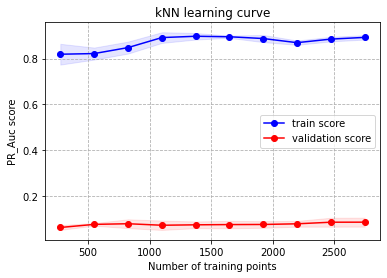

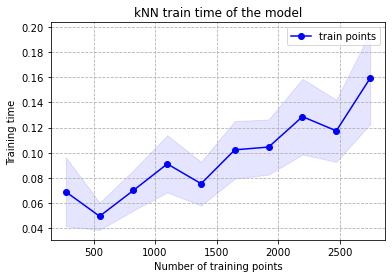

kNN: PR-Auc= 0.114
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1410
           1       0.06      0.22      0.10        63

    accuracy                           0.82      1473
   macro avg       0.51      0.54      0.50      1473
weighted avg       0.92      0.82      0.87      1473

[[1201  209]
 [  49   14]]


In [10]:
pipeline = make_pipeline(data_prep,oversample,KNeighborsClassifier())

train_sizes, train_scores, test_scores,fit_times, _ = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,  scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        

plot_learning_curve(train_sizes, train_scores, test_scores,'kNN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'kNN train time of the model')


from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate pr auc
y_pred = pipeline.predict(X_test)
yhat = pipeline.predict_proba(X_test)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('kNN: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [11]:
print(pipeline.steps[2][1].get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_neighbors_range = list(range(1,5,1))
weights= ['uniform', 'distance']
pipeline = make_pipeline(data_prep,KNeighborsClassifier())
parameters = dict(kneighborsclassifier__n_neighbors=n_neighbors_range, kneighborsclassifier__weights=weights)
grid_search_cv = GridSearchCV(pipeline, parameters,cv=s_kfold,scoring='average_precision')
#rand_search_cv = RandomizedSearchCV(pipeline, parameters,cv=s_kfold,n_jobs=-1, n_iter=100,scoring='average_precision')
grid_search_cv.fit(X_train, y_train)
print("Tuned kNN best params: {}".format(grid_search_cv.best_params_))


Tuned kNN best params: {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__weights': 'distance'}


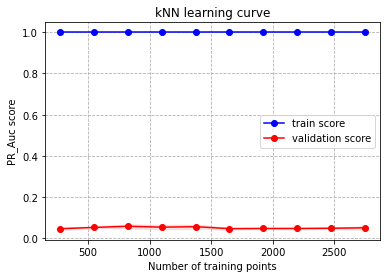

kNN: PR-Auc= 0.125
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1410
           1       0.10      0.11      0.11        63

    accuracy                           0.92      1473
   macro avg       0.53      0.53      0.53      1473
weighted avg       0.92      0.92      0.92      1473

[[1347   63]
 [  56    7]]


In [26]:
pipeline = make_pipeline(data_prep,KNeighborsClassifier(weights='uniform',n_neighbors=1))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold, scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plot_learning_curve(train_sizes, train_scores, test_scores,'kNN learning curve')


from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate pr auc
y_pred = pipeline.predict(X_test)
yhat = pipeline.predict_proba(X_test)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('kNN: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

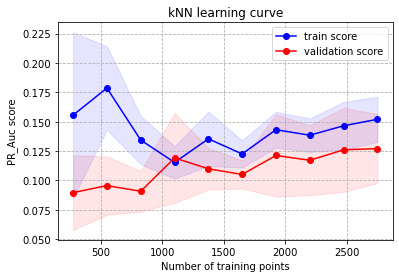

kNN: PR-Auc= 0.104
              precision    recall  f1-score   support

           0       0.98      0.54      0.70      1410
           1       0.07      0.73      0.12        63

    accuracy                           0.55      1473
   macro avg       0.52      0.64      0.41      1473
weighted avg       0.94      0.55      0.68      1473

[[768 642]
 [ 17  46]]


In [17]:
pipeline = make_pipeline(data_prep,oversample,KNeighborsClassifier(weights='uniform',n_neighbors=300))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold, scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plot_learning_curve(train_sizes, train_scores, test_scores,'kNN learning curve')


from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate pr auc
y_pred = pipeline.predict(X_test)
yhat = pipeline.predict_proba(X_test)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('kNN: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

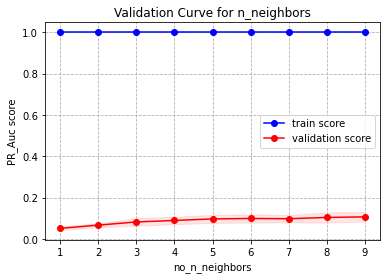

In [12]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,KNeighborsClassifier(weights='distance'))
n_neighbors_range = list(range(1,10,1))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="kneighborsclassifier__n_neighbors", param_range=n_neighbors_range,
        cv=s_kfold, scoring="average_precision", n_jobs=-1)
plot_validation_curve(n_neighbors_range, train_scores, test_scores, "no_n_neighbors", title="Validation Curve for n_neighbors" ,alpha=0.1)

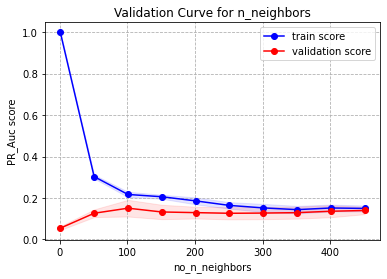

In [13]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,oversample,KNeighborsClassifier())
n_neighbors_range = list(range(1,500,50))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="kneighborsclassifier__n_neighbors", param_range=n_neighbors_range,
        cv=s_kfold, scoring="average_precision", n_jobs=-1)
plot_validation_curve(n_neighbors_range, train_scores, test_scores, "no_n_neighbors", title="Validation Curve for n_neighbors" ,alpha=0.1)